In [1]:
import cv2
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt 
import math
from hw2 import equalize_hist


In [2]:
if __name__ == "__main__":
    img = cv2.imread("./38.png")
    #print(type(img_gray))
    print(img.shape)

(256, 384, 3)


992
749
150


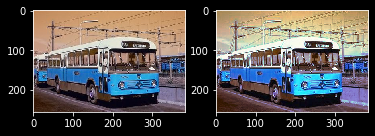

True

In [11]:
    B,G,R = cv2.split(img)
    B_equal = equalize_hist(B)
    G_equal = equalize_hist(G)
    R_equal = equalize_hist(R)
    img_equal = cv2.merge([B_equal,G_equal,R_equal])
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(img_equal)
    plt.show()
    cv2.imwrite("./38_equal.png", img_equal, [int(cv2.IMWRITE_PNG_COMPRESSION), 0])

(256, 384, 3)
(256, 3)
[98304 98304 98304]
[1891  563 1006 1698 1601 1255 1497 1219 1083 1086  894  998  972 1039
 1060 1075 1152 1264 1545 1562 1131 1059 1025  997  939  900  886  860
  868  898  929  886  971 1057  974  974  930  997 1066 1081 1045 1032
  997  971 1039 1039 1023 1072 1046 1102 1065 1083 1135 1194 1256 1230
 1192 1205 1195 1180 1278 1314 1320 1350 1357 1377 1348 1387 1348 1361
 1383 1366 1425 1344 1349 1405 1309 1357 1338 1230 1338 1248 1191 1148
 1148 1192 1107 1195 1188 1186 1207 1185 1263 1312 1240 1367 1389 1534
 1622 1615 1750 1774 1834 1679 1693 1821 1934 1743 1760 1647 1610 1703
 1712 1638 1534 1559 1574 1465 1459 1518 1584 1449 1400 1373 1313 1265
 1186 1214 1232 1145 1276 1303 1440 1305 1290 1251 1222 1157 1237 1291
 1252 1272 1407 1370 1414 1534 1486 1645 1630 1720 1740 1699 1810 1866
 1975 2066 2162 2012 2003 1814 1644 1510 1578 1533 1610 1611 1453 1509
 1439 1306 1251 1065 1010  937  882  784  820  698  669  585  623  626
  592  611  647  658  592  581  63

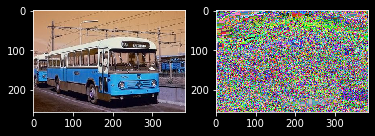

True

In [12]:
    I_array = np.array(img)
    print(I_array.shape[:])
    src_height , src_width , src_channal = I_array.shape[:]

    #calculate the scr picture histogram
    hist_arry = np.zeros((256,3),np.uint32)
    for h in range(src_height):
        for w in range(src_width):
            for c in range(src_channal): 
                hist_arry[I_array[h,w,c],c] += 1
    print(hist_arry.shape)
    pdf_arry = np.zeros(256,np.float)
    print(hist_arry.sum(axis=1))
    pdf_arry = hist_arry.sum(axis=1)/float(hist_arry.size)
    print(pdf_arry)
    #calculate the scr picture cdf
    cdf_arry = np.zeros(256,np.float)
    cdf_arry[0] = pdf_arry[0]
    for i in range(1,256):
        cdf_arry[i] = cdf_arry[i-1] + pdf_arry[i]

    #creat new picture by equalizing its hist
    scaled_array = np.zeros((src_height,src_width,src_channal), np.uint8)
    for h in range(src_height):
        for w in range(src_width):
            for c in range(src_channal): 
                scaled_array[h,w,c] = np.uint8(round(255*cdf_arry[I_array[h,w,c]]))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(scaled_array)
    plt.show()
    cv2.imwrite("./38_equal.png", img_equal, [int(cv2.IMWRITE_PNG_COMPRESSION), 0])